In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter

In [20]:
def match(a, b):
    return set((a, b)) in ({'A', 'U'}, {'C', 'G'})

def name(i, seq):
    return f'{seq[i]} ({i})'

In [3]:
def align_rna(seq, hairpin_size):
    n = len(seq)
    d = np.zeros((n, n), dtype=int)
    trace = np.ones((n, n), dtype=int) * -2
    for diagonal in range(hairpin_size + 1, n):
        for (i, j) in zip(range(n - diagonal), range(diagonal, n)):
            # find best option for union of 2 structures
            jump = max(*[(d[i, k] + d[k + 1, j], k) for k in range(i + 1, j)], key=itemgetter(0))
            
            value, step = max(
                (d[i + 1, j], 1),
                (d[i, j - 1], -1),
                (d[i + 1, j - 1] + 1 if match(seq[i], seq[j]) else d[i + 1, j - 1], 0),
                jump,
                key=itemgetter(0)
            )
            d[i, j] = value
            trace[i, j] = step
    return d, trace

In [4]:
def find_matches(i, j, tr):
    step = tr[i, j]
    if step == -2:
        return []
    elif step > 1:
        m = find_matches(i + step, j, tr) + find_matches(i, j - step, tr)
    elif step == 1:
        m = find_matches(i + 1, j, tr)
    elif step == 0:
        m = [(i, j)] + find_matches(i + 1, j - 1, tr) 
    elif step == -1:
        m = find_matches(i, j - 1, tr)
    return m
    

In [6]:
def show_rna(seq, m):
    G = nx.Graph()
    G.add_nodes_from([name(i, seq) for i in range(len(seq))])
    G.add_edges_from([(name(a, seq), name(b, seq)) for a, b in m])

    plt.figure(figsize=(14,14))
    nx.draw_circular(G,node_color='b', edge_color='k', node_size=1600, with_labels=True, font_color='w')
    plt.axis('equal')
    plt.show()

## Test 1

In [11]:
sequence = 'GGACC'
hairpin_size = 3

In [12]:
d, trace = align_rna(sequence, hairpin_size)
print(d)
print(trace)

[[0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[-2 -2 -2 -2  0]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]
 [-2 -2 -2 -2 -2]]


In [19]:
matches = find_matches(0, len(sequence) - 1, trace)
print(matches)
for a, b in matches:
    print(name(a, sequence), ' - ', name(b, sequence))

[(2, 20), (3, 19), (4, 18), (5, 17), (6, 16), (8, 15), (9, 14)]


TypeError: name() takes 1 positional argument but 2 were given

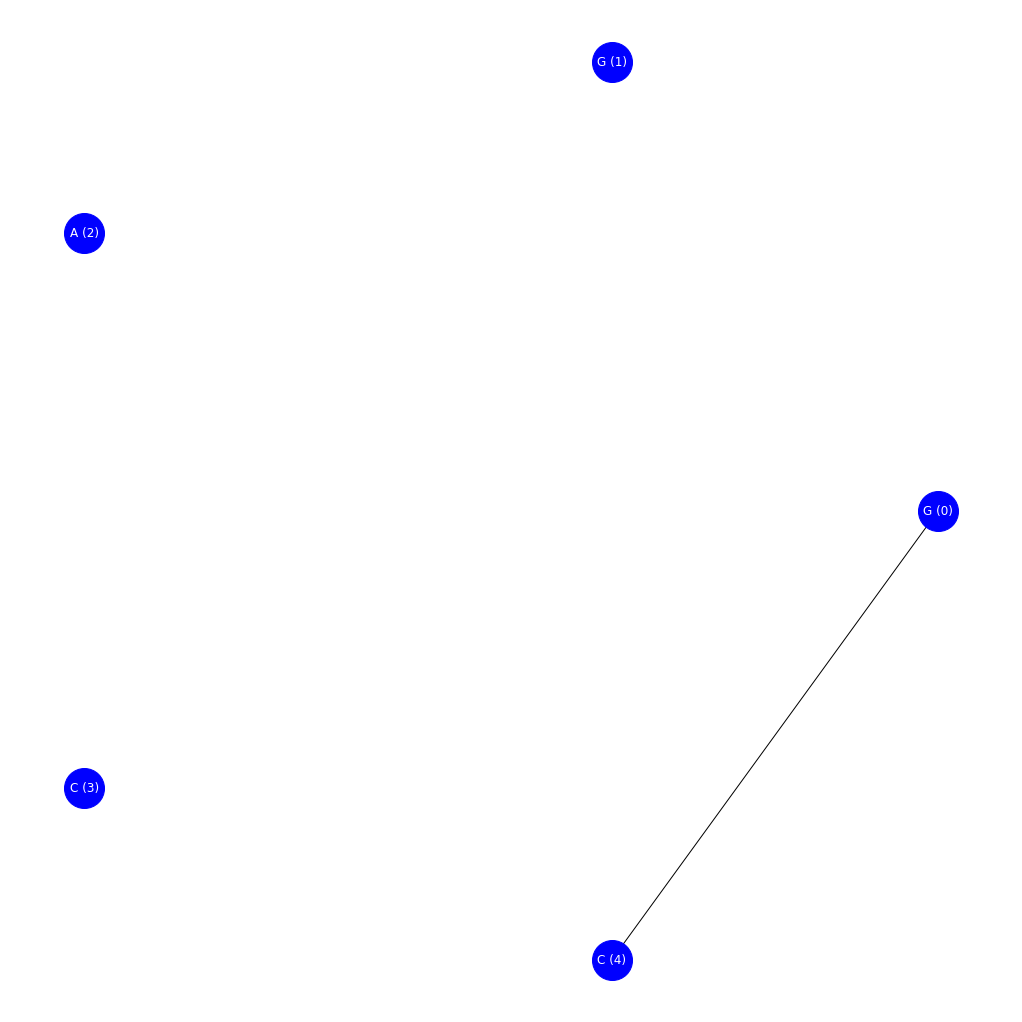

In [15]:
show_rna(sequence, matches)

## Test 2

In [16]:
sequence = 'AAACAUGAGGAUUACCCAUGU'
hairpin_size = 3

In [17]:
d, trace = align_rna(sequence, hairpin_size)
print(d)
print(trace)

[[0 0 0 0 0 1 1 1 1 1 1 2 3 3 3 3 4 4 5 6 7]
 [0 0 0 0 0 1 1 1 1 1 1 2 3 3 3 3 4 4 5 6 7]
 [0 0 0 0 0 0 0 0 1 1 1 2 3 3 3 3 3 4 5 6 7]
 [0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 3 4 5 6 6]
 [0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 3 4 5 5 5]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 3 4 4 4 4]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 3 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 3 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[-2 -2 -2 -2  1  1  1  1  1  1  1  1  1  1  1  1  1  

In [18]:
matches = find_matches(0, len(sequence) - 1, trace)
print(matches)
for a, b in matches:
    print(sequence[a], ' - ', sequence[b])

[(2, 20), (3, 19), (4, 18), (5, 17), (6, 16), (8, 15), (9, 14)]
A  -  U
C  -  G
A  -  U
U  -  A
G  -  C
G  -  C
G  -  C


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


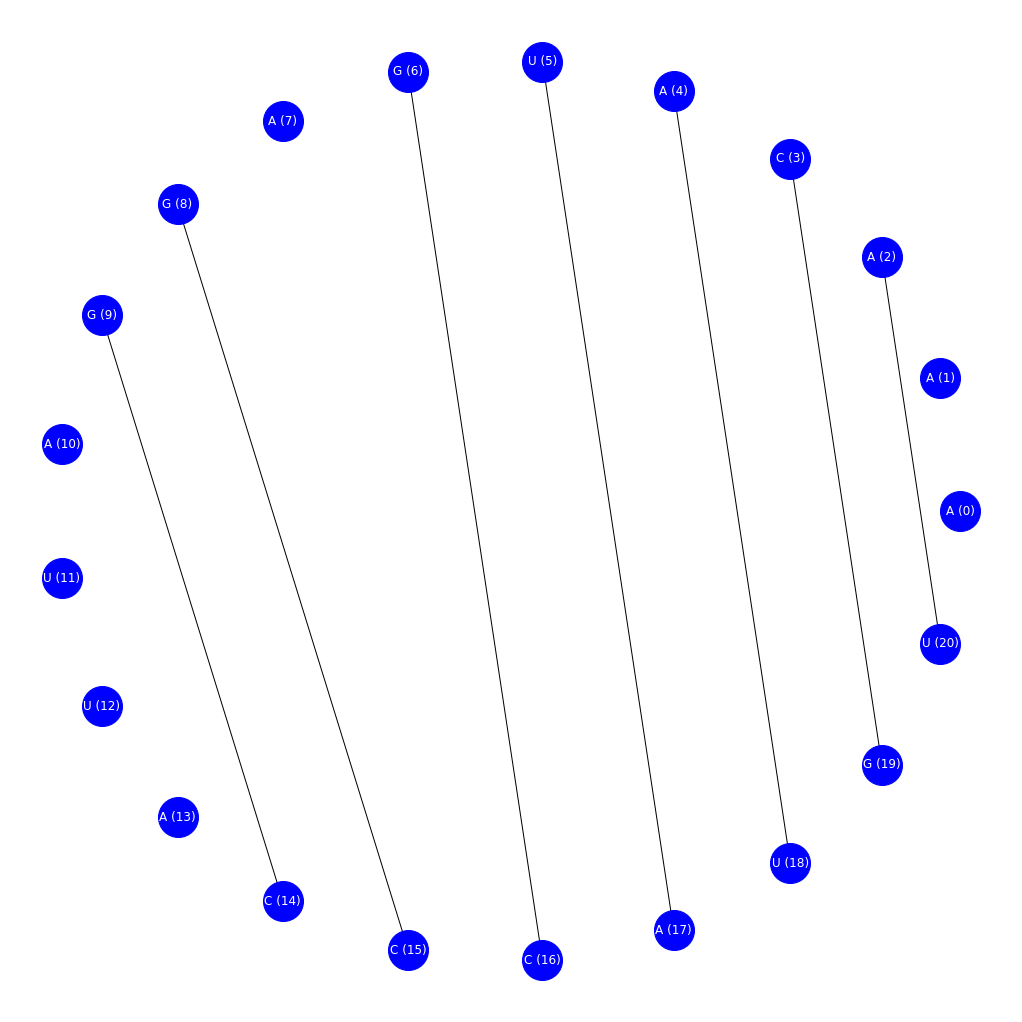

In [10]:
show_rna(sequence, matches)